In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm
import numpy as np
import plotly.graph_objs as go
import ipywidgets as widgets
from IPython.display import display
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import json

/var/folders/9l/lqtxb2s91n15m4jnjpgnxkf80000gn/T/ipykernel_3650/3646879354.py:11: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/9l/lqtxb2s91n15m4jnjpgnxkf80000gn/T/ipykernel_3650/3646879354.py:12: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
final_sales = pd.read_csv("/Users/ningyuhan/Desktop/2023 Spring/Teams/Visualization/final_sales.csv", sep = ",")

In [3]:
final_sales['DATE'] = pd.to_datetime(final_sales['DATE'])
final_sales["YEAR_MONTH"] = final_sales["DATE"].dt.to_period("M")

In [4]:
total_units_monthly = final_sales.groupby(by = "ARTICLE_ID").size()

In [5]:
article_id_list = final_sales['ARTICLE_ID'].unique().tolist()
#print(len(article_id_list))

In [6]:
nov_pred_arima = pd.read_csv("/Users/ningyuhan/Desktop/2023 Spring/Teams/Visualization/nov_final_pred_2m_final.csv")
nov_pred_arima['UNITS'] = nov_pred_arima['UNITS'].round(0).astype(int)

In [7]:
print(nov_pred_arima)

     article_id  UNITS
0         97980   3182
1         97793   2227
2         97759   5652
3         15505   5999
4         15284   2826
..          ...    ...
430        6128    851
431        2928    306
432          33   1228
433        3042    824
434       12275    358

[435 rows x 2 columns]


## Just plot

In [8]:
# def plot_sales(article_id_list, final_sales):
#     plot_dropdown = widgets.Dropdown(options=article_id_list, description='Article ID:')

#     def plot_series(article_id):
#         id_sales = final_sales[final_sales['ARTICLE_ID'] == article_id]
#         total_units_monthly = id_sales.groupby(by="YEAR_MONTH").size()
#         total_units_monthly.index = total_units_monthly.index.to_timestamp()
        
#         predicted_data = nov_pred_arima[nov_pred_arima['article_id'] == article_id]
#         predicted_units = predicted_data['UNITS'].values[0]
#         next_month = pd.to_datetime('2018-11-01')
        
#         fig = go.Figure()
#         fig.add_trace(go.Scatter(x=total_units_monthly.index, 
#                                  y=total_units_monthly.values, 
#                                  mode='markers', name='Actual', 
#                                  hovertemplate='<b>Date:</b> %{x|%Y-%m}<br><b>Units:</b> %{y}'))
        
#         fig.add_trace(go.Scatter(x=[total_units_monthly.index[-1], next_month], 
#                                  y=[total_units_monthly.values[-1], predicted_units], 
#                                  mode='lines', name='', line=dict(color='blue', dash='dash'), showlegend=False))
        
#         fig.add_trace(go.Scatter(x=total_units_monthly.index, 
#                                  y=total_units_monthly.values, 
#                                  mode='lines', name='',
#                                  hoverinfo='none', line=dict(color='red'), showlegend=False))
        
#         fig.add_trace(go.Scatter(x=[next_month], y=[predicted_units], mode='markers', name='Prediction-ARIMA', 
#                              marker=dict(color='red', size=10, line=dict(width=2, color='black')), 
#                              hovertemplate='<b>Date:</b> %{x|%Y-%m}<br><b>Units:</b> %{y}'))
        
#         fig.update_layout(xaxis_title='Date', 
#                           yaxis_title='Units', 
#                           title=f'Unit Sales for Article ID {article_id}', 
#                           hovermode='closest', legend=dict(x=1.02, y=0.5))
#         fig.show()

#     widgets.interact(plot_series, article_id=plot_dropdown)

In [9]:
# article_ids = article_id_list
# sales_data = final_sales
# plot_sales(article_ids, sales_data)

## To single HTML

In [10]:
# import plotly.io as pio
# import os

In [11]:
# def plot_sales(article_id_list, final_sales):
#     plot_dropdown = widgets.Dropdown(options=article_id_list, description='Article ID:')

#     def plot_series(article_id):
#         id_sales = final_sales[final_sales['ARTICLE_ID'] == article_id]
#         total_units_monthly = id_sales.groupby(by="YEAR_MONTH").size()
#         total_units_monthly.index = total_units_monthly.index.to_timestamp()
        
#         predicted_data = nov_pred_arima[nov_pred_arima['article_id'] == article_id]
#         predicted_units = predicted_data['UNITS'].values[0]
#         next_month = pd.to_datetime('2018-11-01')
        
#         fig = go.Figure()
#         fig.add_trace(go.Scatter(x=total_units_monthly.index, 
#                                  y=total_units_monthly.values, 
#                                  mode='markers', name='Actual', 
#                                  hovertemplate='<b>Date:</b> %{x|%Y-%m}<br><b>Units:</b> %{y}'))
        
#         fig.add_trace(go.Scatter(x=[total_units_monthly.index[-1], next_month], 
#                                  y=[total_units_monthly.values[-1], predicted_units], 
#                                  mode='lines', name='', line=dict(color='blue', dash='dash'), showlegend=False))
        
#         fig.add_trace(go.Scatter(x=total_units_monthly.index, 
#                                  y=total_units_monthly.values, 
#                                  mode='lines', name='',
#                                  hoverinfo='none', line=dict(color='red'), showlegend=False))
        
#         fig.add_trace(go.Scatter(x=[next_month], y=[predicted_units], mode='markers', name='Prediction-ARIMA', 
#                              marker=dict(color='red', size=10, line=dict(width=2, color='black')), 
#                              hovertemplate='<b>Date:</b> %{x|%Y-%m}<br><b>Units:</b> %{y}'))
        
#         fig.update_layout(xaxis_title='Date', 
#                           yaxis_title='Units', 
#                           title=f'Unit Sales for Article ID {article_id}', 
#                           hovermode='closest', legend=dict(x=1.02, y=0.5))
#         fig.show()
        
#         fig_html = pio.to_html(fig, full_html=False)

#         dropdown_html = widgets.HTML(f'<label>{plot_dropdown.description}</label>{plot_dropdown}')

#         fig_html = fig_html.replace('<div>', f'<div>{dropdown_html}')

#         filename = f'plot_{article_id}.html'
#         filepath = os.path.join('/Users/ningyuhan/Desktop/Visualization', filename)
        
#         with open(filepath, 'w') as f:
#             f.write(fig_html)

#         os.system(f'open {filepath}')

#     widgets.interact(plot_series, article_id=plot_dropdown)

In [12]:
# article_ids = article_id_list
# sales_data = final_sales
# plot_sales(article_ids, sales_data)

## Dash

In [13]:
def plot_sales(article_id_list, final_sales):

    app = dash.Dash(__name__)

    app.layout = html.Div([
        html.Label('Article ID:'),
        dcc.Dropdown(id='article-dropdown', options=[{'label': str(id), 'value': id} for id in article_id_list]),
        dcc.Graph(id='sales-graph')
    ])

    @app.callback(
        Output('sales-graph', 'figure'),
        Input('article-dropdown', 'value')
    )
    def plot_series(article_id):
        id_sales = final_sales[final_sales['ARTICLE_ID'] == article_id]
        total_units_monthly = id_sales.groupby(by="YEAR_MONTH").size()
        total_units_monthly.index = total_units_monthly.index.to_timestamp()
        
        predicted_data = nov_pred_arima[nov_pred_arima['article_id'] == article_id]
        predicted_units = predicted_data['UNITS'].values[0]
        next_month = pd.to_datetime('2018-11-01')
        
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=total_units_monthly.index, 
                                 y=total_units_monthly.values, 
                                 mode='markers', name='Actual', 
                                 hovertemplate='<b>Date:</b> %{x|%Y-%m}<br><b>Units:</b> %{y}'))
        
        fig.add_trace(go.Scatter(x=[total_units_monthly.index[-1], next_month], 
                                 y=[total_units_monthly.values[-1], predicted_units], 
                                 mode='lines', name='', line=dict(color='blue', dash='dash'), showlegend=False))
        
        fig.add_trace(go.Scatter(x=total_units_monthly.index, 
                                 y=total_units_monthly.values, 
                                 mode='lines', name='',
                                 hoverinfo='none', line=dict(color='red'), showlegend=False))
        
        fig.add_trace(go.Scatter(x=[next_month], y=[predicted_units], mode='markers', name='Prediction-SARIMA', 
                             marker=dict(color='red', size=10, line=dict(width=2, color='black')), 
                             hovertemplate='<b>Date:</b> %{x|%Y-%m}<br><b>Units:</b> %{y}'))
        
        fig.update_layout(xaxis_title='Date', 
                          yaxis_title='Units', 
                          title=f'Unit Sales for Article ID {article_id}', 
                          hovermode='closest', legend=dict(x=1.02, y=0.5))
        return fig

    app.run_server()


In [ ]:
article_ids = article_id_list
sales_data = final_sales
plot_sales(article_ids, sales_data)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [25/Apr/2023 00:25:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Apr/2023 00:25:06] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_9_3m1681661059.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Apr/2023 00:25:06] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_9_3m1681661058.min.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Apr/2023 00:25:06] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_9_3m1681661059.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Apr/2023 00:25:06] "GET /_dash-component-suites/dash/dcc/dash_core_components.v2_9_2m1681661059.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Apr/2023 00:25:06] "GET /_dash-component-suites/dash/html/dash_html_components.v2_0_11m1681661059.min.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Apr/2023 00:25:06] "GET /_dash-component-suites/dash/dash_table/bundle.v5_2_4m1681661059.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Apr/2023 00:25:06] "GET /_dash-layout HTTP/1.1" 200 -

In [14]:
final_sales_20181031 = pd.read_csv("/Users/ningyuhan/Desktop/2023 Spring/Teams/Visualization/final_sales_20181031.csv", sep = ",")

In [15]:
oct_act = final_sales_20181031.groupby('ARTICLE_ID')['UNITS'].sum().to_dict()

In [16]:
oct_act = pd.DataFrame.from_dict(oct_act, orient='index', columns=['UNITS'])
oct_act = oct_act.reset_index().rename(columns={'index': 'ARTICLE_ID'})

In [17]:
oct_act['ARTICLE_ID'] = oct_act['ARTICLE_ID'].astype(str)

In [18]:
oct_act = oct_act.rename(columns={'UNITS': 'Actual_Sales'})

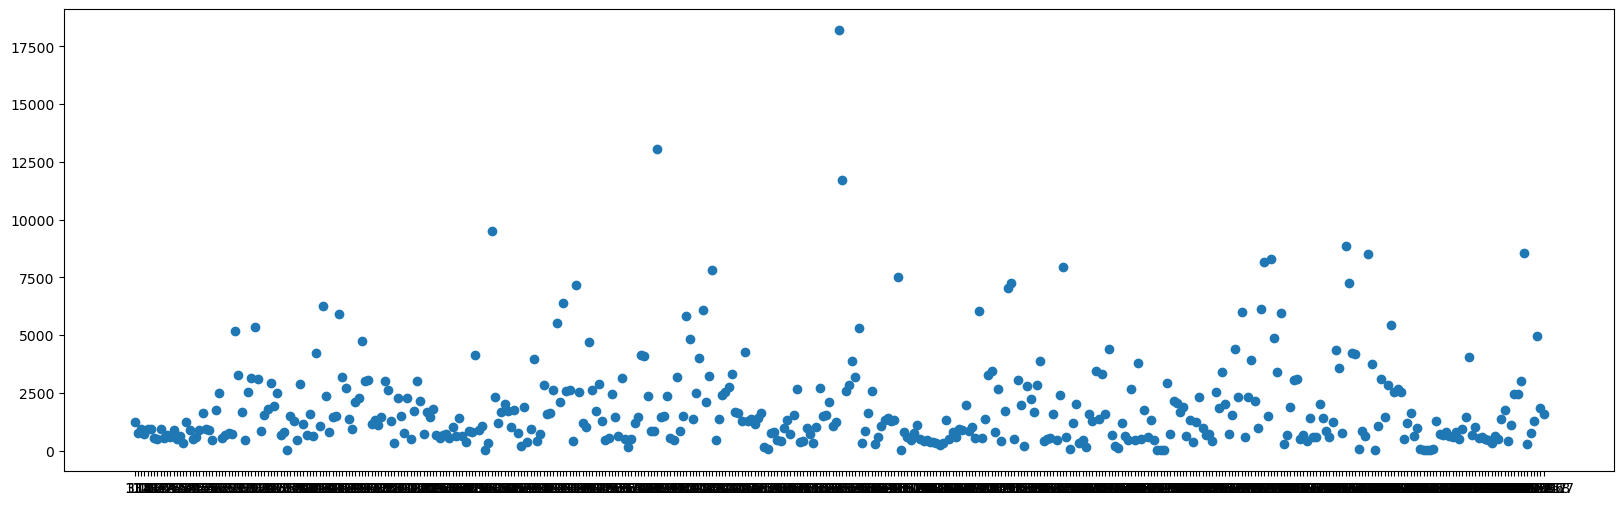

In [19]:
plt.figure(figsize=(20,6))
#plt.xticks(rotation=90)
plt.title('')
plt.scatter(oct_act["ARTICLE_ID"], oct_act["Actual_Sales"])
plt.show()

In [20]:
# nov_final_pred_2m_final = pd.read_csv("/Users/ningyuhan/Desktop/nov_final_pred_2m_final.csv", sep = ",")

In [21]:
# nov_final_pred_2m_final = nov_final_pred_2m_final.rename(columns={'UNITS': 'Pred_Sales'})
# nov_final_pred_2m_final = nov_final_pred_2m_final.rename(columns={'article_id': 'ARTICLE_ID'})

In [22]:
# nov_final_pred_2m_final['ARTICLE_ID'] = nov_final_pred_2m_final['ARTICLE_ID'].astype(str)

In [23]:
# combined_df = pd.merge(oct_act, nov_final_pred_2m_final, on='ARTICLE_ID', how='outer')

In [24]:
# plt.figure(figsize=(20, 6))

# plt.scatter(combined_df['ARTICLE_ID'], combined_df['Actual_Sales'], c='blue', label='Actual_Sales')
# plt.scatter(combined_df['ARTICLE_ID'], combined_df['Pred_Sales'], c='red', label='Pred_Sales')
# plt.title('Acutual and Predicted Unit Sales',fontsize = 18)
# plt.xlabel('Article ID',fontsize = 18)
# plt.ylabel('Sales',fontsize = 18)
# plt.xticks([], [])
# plt.legend()

# plt.savefig('Actual + Prediction.png')

# plt.show()

In [25]:
# combined_df['Residuals'] = combined_df['Actual_Sales'] - combined_df['Pred_Sales']

In [26]:
# plt.figure(figsize=(20,6))
# plt.title('Residual Plot',fontsize = 18)
# plt.scatter(combined_df["ARTICLE_ID"], combined_df["Residuals"])
# plt.xlabel('Article ID',fontsize = 18)
# plt.ylabel('Residuals', fontsize = 18)
# plt.xticks([], [])

# plt.savefig('Residual.png')

# plt.show()

In [27]:
with open("oct_prediction_v2.json") as json_file:
    oct_pred = json.load(json_file)

In [28]:
oct_pred = pd.DataFrame.from_dict(oct_pred, orient='index', columns=['UNITS'])
oct_pred = oct_pred.reset_index().rename(columns={'index': 'ARTICLE_ID'})

In [29]:
oct_pred['UNITS'] = oct_pred['UNITS'].round(0).astype(int)
oct_pred

,ARTICLE_ID,UNITS
0,97980,3247
1,97793,2344
2,97759,6287
3,15505,4279
4,15284,2694
...,...,...
338,3520,832
339,2286,447
340,2255,510
341,2263,393


In [30]:
combined_oct = pd.merge(oct_act, oct_pred, on='ARTICLE_ID', how='outer')

In [31]:
combined_oct = combined_oct.dropna(axis=0)
combined_oct = combined_oct.rename(columns={'UNITS': 'Pred_Sales'})

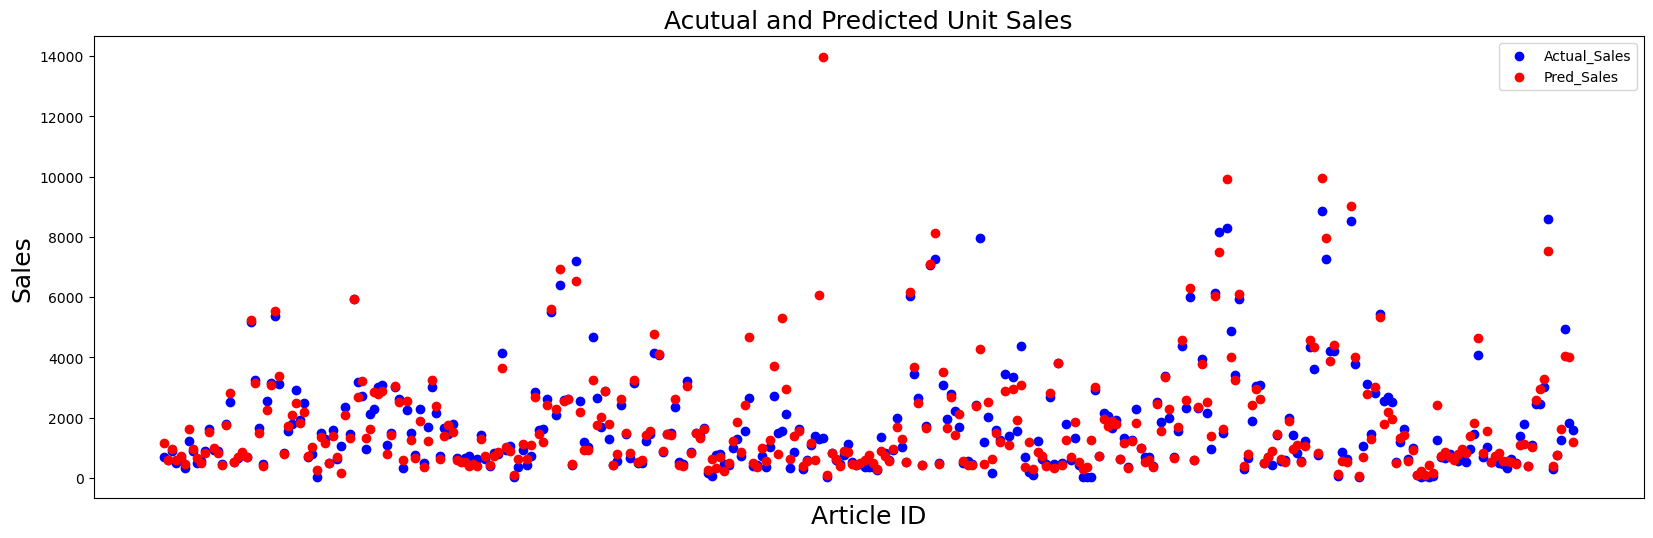

In [32]:
plt.figure(figsize=(20, 6))

plt.scatter(combined_oct['ARTICLE_ID'], combined_oct['Actual_Sales'], c='blue', label='Actual_Sales')
plt.scatter(combined_oct['ARTICLE_ID'], combined_oct['Pred_Sales'], c='red', label='Pred_Sales')
plt.title('Acutual and Predicted Unit Sales',fontsize = 18)
plt.xlabel('Article ID',fontsize = 18)
plt.ylabel('Sales',fontsize = 18)
plt.xticks([], [])
plt.legend()

plt.savefig('Actual + Prediction.png')

plt.show()

In [33]:
combined_oct['Residuals'] = combined_oct['Actual_Sales'] - combined_oct['Pred_Sales']

In [34]:
combined_oct

,ARTICLE_ID,Actual_Sales,Pred_Sales,Residuals
10,215,691.0,1171.0,-480.0
11,227,606.0,576.0,30.0
12,255,897.0,956.0,-59.0
13,265,508.0,581.0,-73.0
14,436,651.0,738.0,-87.0
...,...,...,...,...
430,7099715,758.0,753.0,5.0
431,7099716,1259.0,1615.0,-356.0
432,7099717,4955.0,4043.0,912.0
433,7099718,1833.0,3998.0,-2165.0


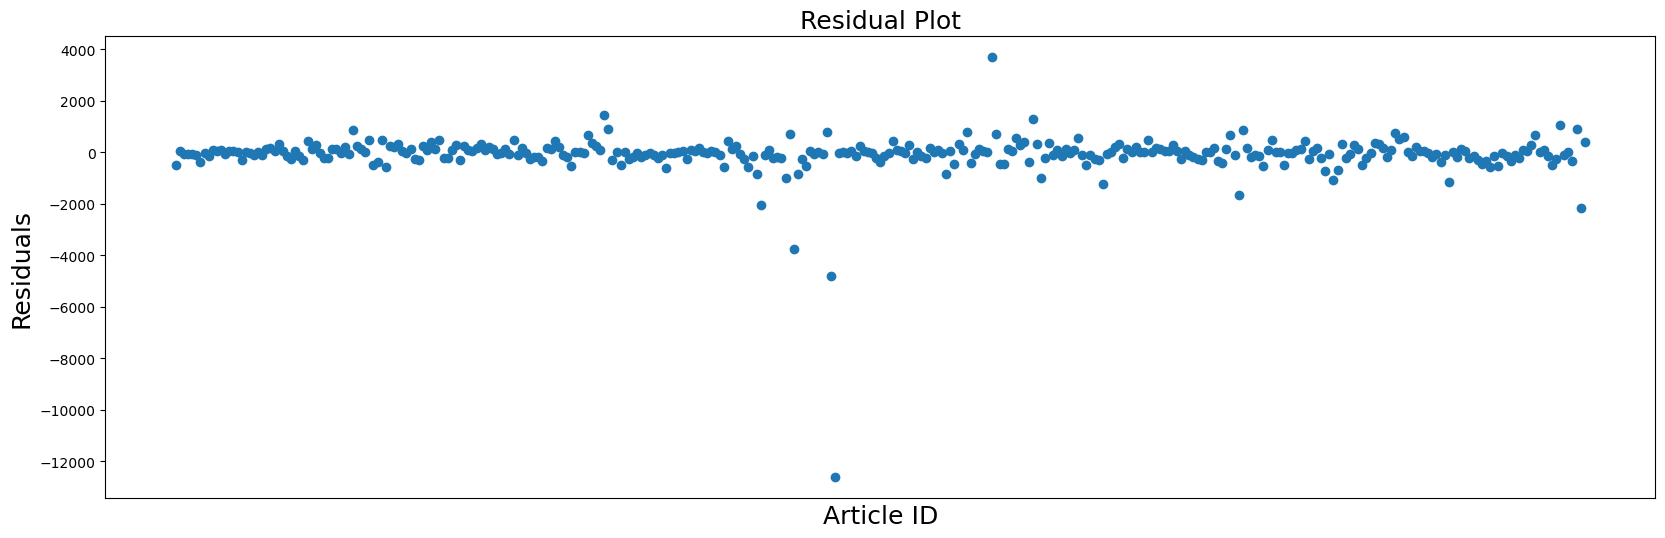

In [35]:
plt.figure(figsize=(20,6))
plt.title('Residual Plot',fontsize = 18)
plt.scatter(combined_oct["ARTICLE_ID"], combined_oct["Residuals"])
plt.xlabel('Article ID',fontsize = 18)
plt.ylabel('Residuals', fontsize = 18)
plt.xticks([], [])

plt.savefig('Residual.png')

plt.show()

In [36]:
filtered_df = combined_oct.loc[(combined_oct['Residuals'] > 2000) | (combined_oct['Residuals'] < -2000)]

In [37]:
filtered_df

,ARTICLE_ID,Actual_Sales,Pred_Sales,Residuals
204,6070,2647.0,4677.0,-2030.0
213,6239,1547.0,5304.0,-3757.0
233,7400,1275.0,6063.0,-4788.0
234,7403,1334.0,13953.0,-12619.0
286,15505,7956.0,4279.0,3677.0
433,7099718,1833.0,3998.0,-2165.0
